In [1]:
%matplotlib inline


# Plotting shots

Start by watching the video below, then learn how to plot shot positions.

..  youtube:: GWsK_KWKCas
   :width: 640
   :height: 349


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

### Using Statsbomb Data

In [3]:
parser = Sbopen()
df_competition = parser.competition()
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [4]:
# Looking for particular matches

df_match = parser.match(competition_id=11,season_id=90)
df_match.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [5]:
df_match_rm = df_match[df_match['home_team_name'].str.contains('Real Madrid')]
df_match_rm.head()

# Todos los partidos del Real Madrid como local en LaLiga 2020-2021

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
2,3773497,2021-04-10,2021-04-10 21:00:00,2,1,available,available,2021-04-25 19:46:09.138046,2022-08-04 12:00:00,30,...,1,Regular Season,5341,Estadio Alfredo Di Stéfano,214,Spain,183.0,Jesús Gil Manzano,214.0,Spain


In [6]:
df_event, df_related, df_freeze, df_tactics = parser.event(df_match_rm.match_id.values[0])
print(df_event.team_name.unique())

['Real Madrid' 'Barcelona']


In [7]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3991 non-null   object 
 1   index                           3991 non-null   int64  
 2   period                          3991 non-null   int64  
 3   timestamp                       3991 non-null   object 
 4   minute                          3991 non-null   int64  
 5   second                          3991 non-null   int64  
 6   possession                      3991 non-null   int64  
 7   duration                        2948 non-null   float64
 8   match_id                        3991 non-null   int64  
 9   type_id                         3991 non-null   int64  
 10  type_name                       3991 non-null   object 
 11  possession_team_id              3991 non-null   int64  
 12  possession_team_name            39

## Opening the dataset
The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
Using method *event* and putting the id of the game as a parameter we load the data.
The event data, which we will mostly focus on,
is stored in a dataframe *df*. From this dataframe we take out the names of the two teams.
Then, we filter the dataframe so that only shots are left.



In [8]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
team1, team2 = df.team_name.unique()
print(team1,' ',team2)
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

England Women's   Sweden Women's


In [9]:
shots.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
f158cbc0-a7a1-4787-8f73-15c66ae55764,340,1,00:10:24.396000,10,24,18,1.342346,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
de5c41c5-9200-439e-b051-bfe2016d689a,531,1,00:15:28.174000,15,28,25,0.472900,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106faebb-00bc-4453-b1c1-1bacdb1ebbc5,720,1,00:21:08.216000,21,8,35,1.254112,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309f6f06-3977-49ac-8c0b-0e31b54404ed,742,1,00:22:46.449000,22,46,37,1.118733,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d1c8dbc7-a164-4e34-8674-1eeba842cbbd,956,1,00:30:38.174000,30,38,52,1.359400,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Making the shot map using iterative solution
First let's draw the pitch using the [MPL Soccer class](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html),

In this example, we set variables for pitch length and width to the Statsbomb coordinate system (they use yards).
You can read more about [different coordinate systems here](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html)

Now, we iterate through all the shots in the match. We take *x* and *y* coordinates, the team name and information
if goal was scored. If It was scored, we plot a solid circle with a name of the player, if not, we plot a
transculent circle (parameter alpha tunes the transcluency).
To have England's shots on one half and Sweden shots on the other half,
we subtract *x* and *y* from the pitch length and height.

Football data tends to be attacking left to right, and we will use this as default in the course.



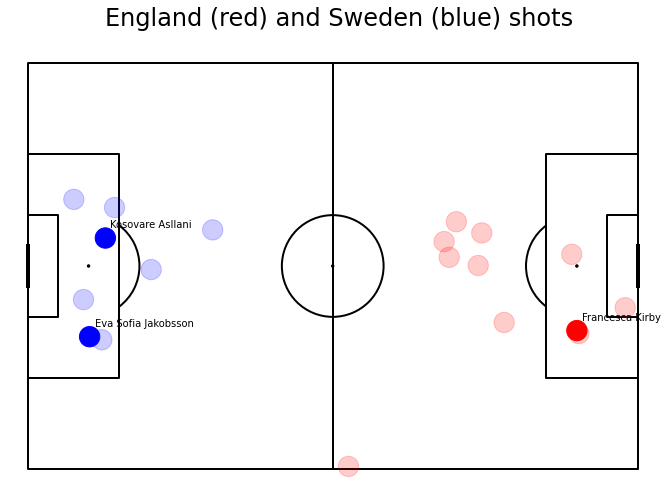

In [10]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information 
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

## Using mplsoccer's Pitch class
This time we make a direct query to return only shots by each team.
We only need the columns with cooridnates, outcome (showing if goal was scored),
and player name. If a goal was scored, we use scatter method
to plot a circle and annotate method to mark scorer's name.
If not, we use scatter method to draw a translucent circle. 
Note that, once again, to plot the shots on different halves we needed to reverse the coordinates for Sweden.
Using pitch.scatter we could have plotted all shots using one line. 
However, since name of a player and alpha differs if goal was scored,
it was more convenient to loop through smaller dataset.



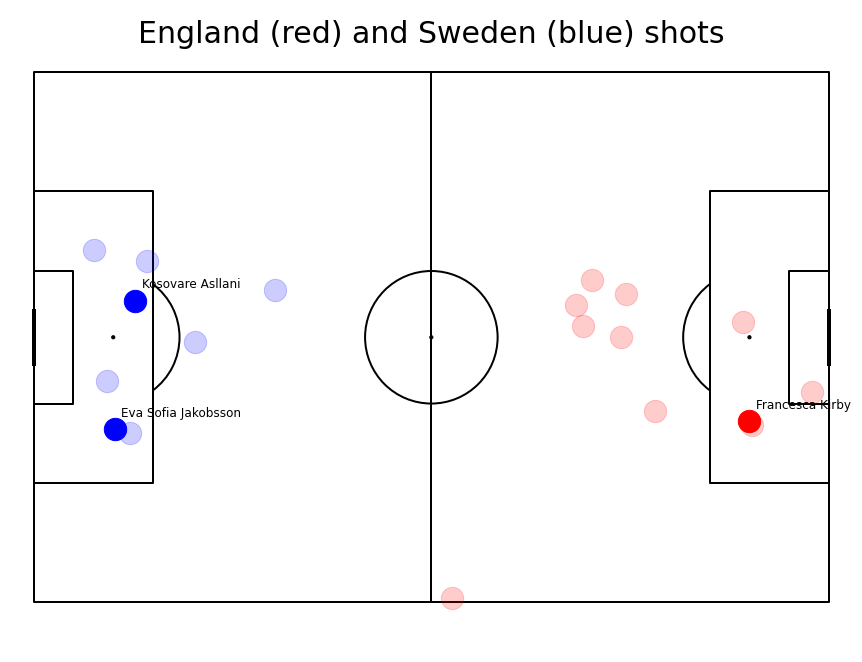

In [11]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle 
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch']) 
       
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]   

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch']) 
       
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)           
plt.show()

## Plotting shots on one half
To plot shots of only one team on one half we use VerticalPitch() class
If you set *half* to *True*, you will plot only one half of the pitch.
It is a nice way of plotting shots since they rarely occur on the defensive half.
We plot all the shots at once this time, without looping through the dataframe this time.



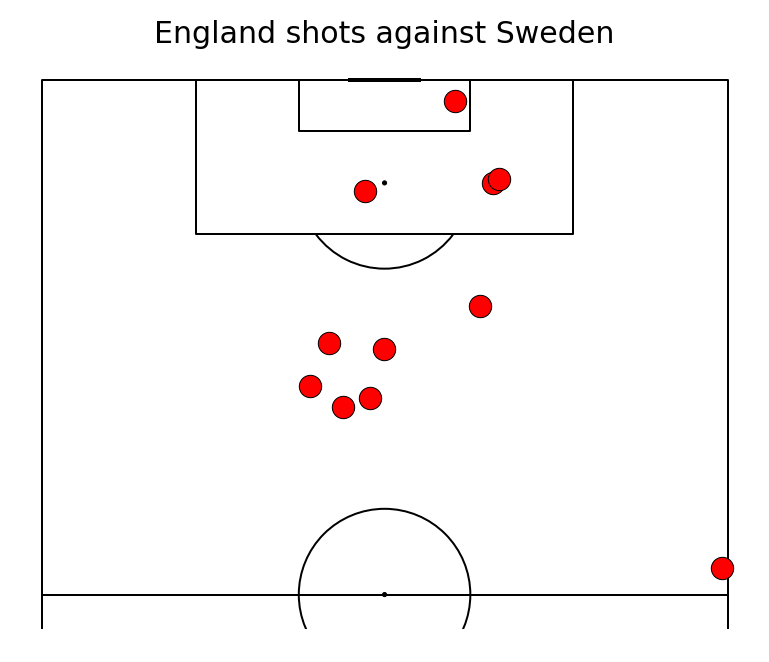

In [12]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black") 
fig.suptitle("England shots against Sweden", fontsize = 30)           
plt.show()

### Exercise - Plot Every Shot of a game from the last Euros

In [13]:
df_competition = parser.competition()
df_competition = df_competition[(df_competition.competition_name.str.contains('Euro')) & (df_competition.competition_gender=="male")]
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
39,55,43,Europe,UEFA Euro,male,False,True,2020,2022-02-01T17:20:34.319496,2022-08-04T12:00,2022-08-04T12:00,2022-02-01T17:20:34.319496


In [14]:
df_match = parser.match(competition_id=55,season_id=43)
df_match[df_match['competition_stage_name']=='Final']

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
16,3795506,2021-07-11,2021-07-11 21:00:00,1,1,available,available,2021-07-12 12:27:50.647,2022-08-04 12:00:00,7,...,26,Final,4666,Wembley Stadium,68,England,287,Björn Kuipers,160,Netherlands


In [15]:
df_event = parser.event(3795506)[0]
team1, team2 = df_event.team_name.unique()
print(team1,'\n',team2)
#A dataframe of shots
shots = df_event.loc[df_event['type_name'] == 'Shot'].set_index('id')
shots.head()

Italy 
 England


,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,shot_one_on_one,foul_committed_offensive,pass_miscommunication,shot_open_goal,pass_cut_back,injury_stoppage_in_chain
id,,,,,,,,,,,,,,,,,,,,,
6605af47-8d44-4f52-9b8d-65598a9c0ef1,71,1,00:01:57.240000,1,57,6,0.306164,3795506,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43cfe556-8ddb-4555-9b06-916fdc87cec0,209,1,00:07:04.491000,7,4,12,1.002311,3795506,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86fd78d6-b940-4466-b784-63c027a314da,879,1,00:27:13.854000,27,13,46,1.268794,3795506,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25b8b5ce-f785-40cf-944c-21927bde4792,1287,1,00:34:39.568000,34,39,57,0.728548,3795506,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89226b23-db53-4e2e-865e-4dda2d1dbaa9,1721,1,00:45:54.658000,45,54,74,0.167718,3795506,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
shots.columns

Index(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'sub_type_id', 'sub_type_name',
       'body_part_id', 'body_part_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'aerial_won', 'pass_deflected',
       'counterpress', 'technique_id', 'technique_name', 'pass_switch',
       'pass_cross', 'pass_assisted_shot_id', 'pass_goal_assist',
       'shot_statsbomb_xg', 'end_z', 'shot_key_pass_id', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'off_camera',
       'foul_won_defensive', 'out', 'ball_recovery_recover

In [17]:
shots.shape[0]

35

In [18]:
# Eliminamos los tiros de la tanda de penaltis
shots = shots[shots['period']<5]
shots.player_name

id
6605af47-8d44-4f52-9b8d-65598a9c0ef1                Luke Shaw
43cfe556-8ddb-4555-9b06-916fdc87cec0          Lorenzo Insigne
86fd78d6-b940-4466-b784-63c027a314da          Lorenzo Insigne
25b8b5ce-f785-40cf-944c-21927bde4792          Federico Chiesa
89226b23-db53-4e2e-865e-4dda2d1dbaa9            Ciro Immobile
40b40285-f562-46ab-ba45-100aa4094c71           Marco Verratti
b414bbbc-2594-456f-a9a9-861836d6685a         Leonardo Bonucci
1217ace3-08bc-4e72-8c75-9d198d123515          Lorenzo Insigne
d9ebf773-edd5-4626-9708-3ba8fbc7d2c4          Lorenzo Insigne
4a5df73c-ad9c-47d7-a2b9-d08e018c1899            Harry Maguire
ef5399e2-0749-43cf-be85-abbb865c01fc          Federico Chiesa
17c2e87d-2979-43e6-9594-f32d7e5bb80e          Lorenzo Insigne
1ff8f1f1-a983-4ca2-9bd6-94e2bd60b5fd          Federico Chiesa
dc30e4af-d57a-4e93-98c6-63d4ca831975              John Stones
4f7eb115-f8e2-47a3-b86e-3a607a7397f3           Marco Verratti
a221a567-b43e-45d6-97f2-07b1cab75d21         Leonardo Bonucci
49ce3

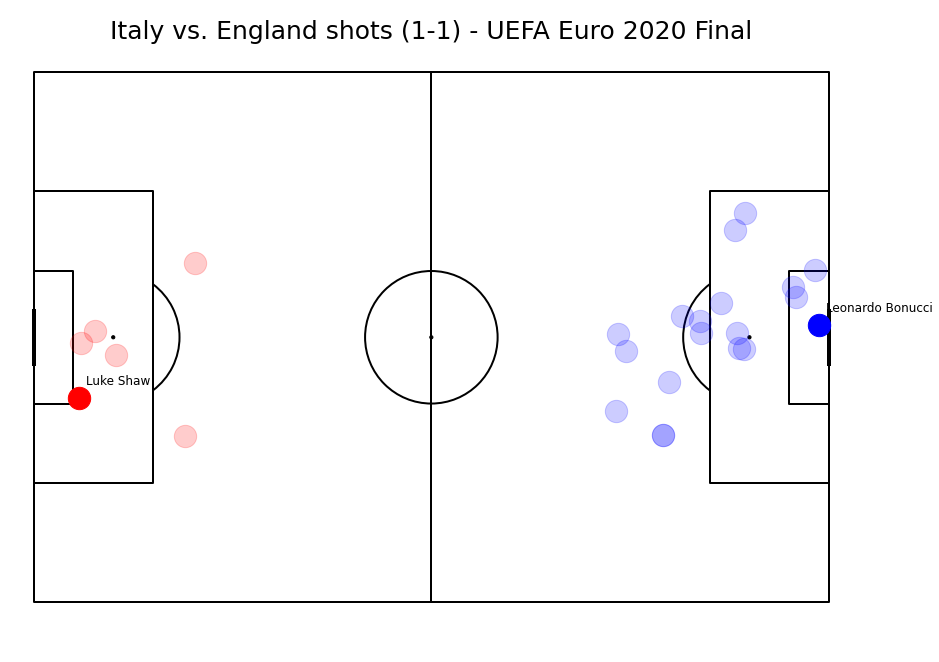

In [19]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

df = shots[['x', 'y', 'outcome_name', "player_name",'team_name']]

df_eng = df[df['team_name'].str.contains('England')]
df_ita = df[df['team_name'].str.contains('Italy')]

g1=[]
for i, j in df_ita.iterrows():
    if j["outcome_name"] == 'Goal':
    #make circle
       g1.append(i)
       pitch.scatter(j.x, j.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(j["player_name"], (j.x + 1, j.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(j.x, j.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
g2=[]    
for i, j in df_eng.iterrows():
    if j["outcome_name"] == 'Goal':
    #make circle
       g2.append(i)
       pitch.scatter(120 - j.x, 80 - j.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(j["player_name"], (120 - j.x + 1, 80 - j.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120-j.x, 80-j.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])


fig.suptitle('Italy vs. England shots ({}-{}) - UEFA Euro 2020 Final'.format(len(g1),len(g2)),fontsize=25)
plt.show()

## Challenge - try it before looking at the next page
1) Create a dataframe of passes which contains all the passes in the match
2) Plot the start point of every Sweden pass. Attacking left to right.
3) Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
4) Plot arrows to show where the passes went to.



In [25]:
df = parser.event(69301)[0]
df.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [26]:
passes = df[(df['type_name']=='Pass') & (df['sub_type_name']!='Throw-in')]
passes.shape[0]

868

In [27]:
passes.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


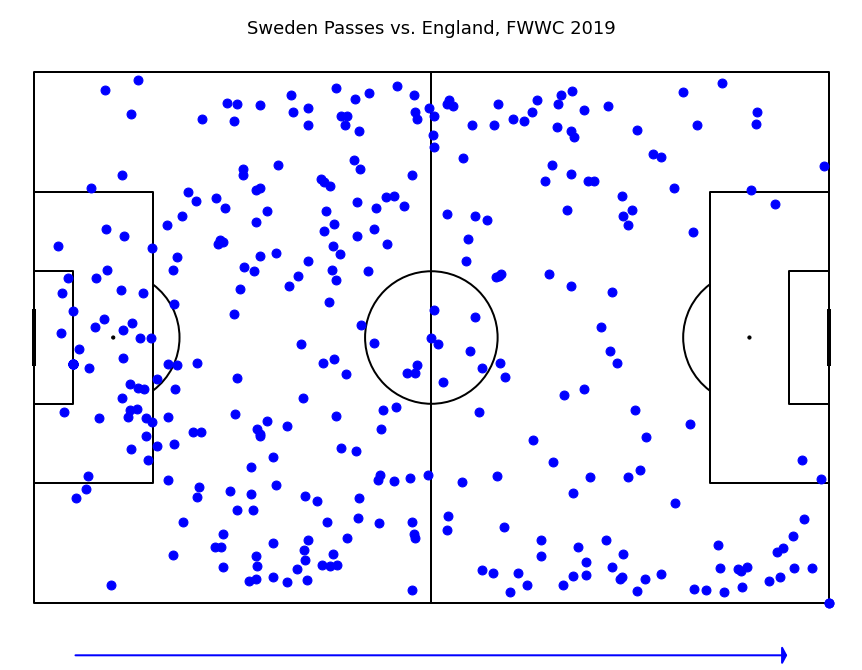

In [28]:
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

df_swe = passes[passes['team_name'].str.contains('Sweden')]

for i, j in df_swe.iterrows():
    #make circle
       pitch.scatter(j.x, j.y, alpha = 1, s = 80, color = "blue", ax=ax['pitch'])
plt.annotate('', xy=(0.95, -0.01), xycoords='axes fraction', xytext=(0.05, -0.01), 
            arrowprops=dict(arrowstyle='-|>, head_width=0.75', color='blue',lw=2))
fig.suptitle('Sweden Passes vs. England, FWWC 2019',fontsize=18)
plt.show()

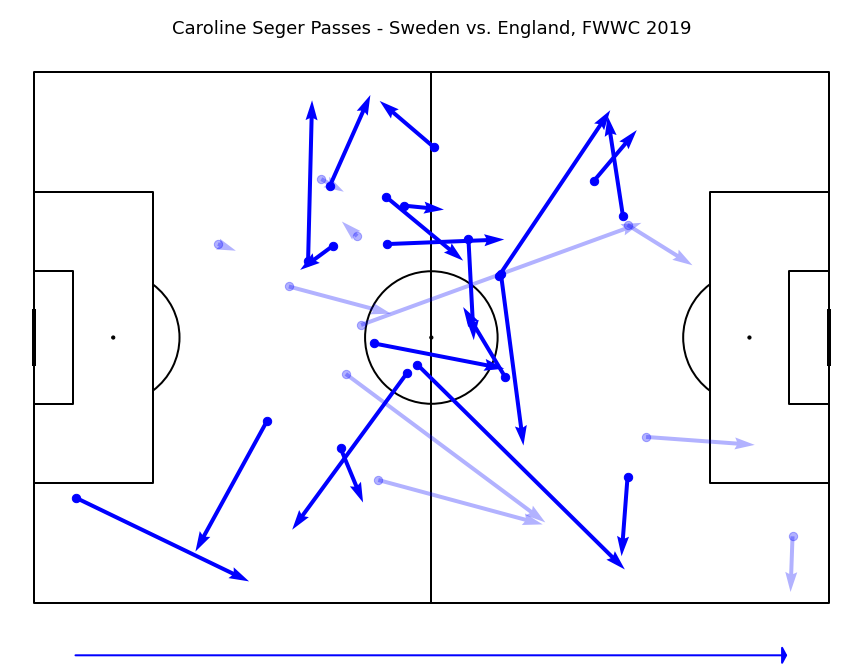

In [29]:
df_swe = df_swe[df_swe.player_name=='Sara Caroline Seger']
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

for i, j in df_swe.iterrows():
    #make circle
        if j['outcome_name']=='Incomplete' or j['outcome_name']=='Out':
            pitch.scatter(j.x, j.y, alpha = .3, s = 70, color = "blue", ax=ax['pitch'])
            pitch.arrows(j.x, j.y,
                         j.end_x, j.end_y, lw=1,
                        zorder=1, ax=ax['pitch'],color='blue',alpha=.3)
        else:
            pitch.scatter(j.x, j.y, alpha = 1, s = 70, color = "blue", ax=ax['pitch'])
            pitch.arrows(j.x, j.y,
                         j.end_x, j.end_y, lw=1,
                        zorder=1, ax=ax['pitch'],color='blue',alpha=1)
            
plt.annotate('', xy=(0.95, -0.01), xycoords='axes fraction', xytext=(0.05, -0.01), 
            arrowprops=dict(arrowstyle='-|>, head_width=0.75', color='blue',lw=2))
fig.suptitle('Caroline Seger Passes - Sweden vs. England, FWWC 2019',fontsize=18)
plt.show()